In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import binary_fill_holes

In [120]:
s1 = cv2.imread('./resized-dataset/train/Glass Perchlet/img0.png')
s2 = cv2.imread('./resized-dataset/train/Gold Fish/img0.png')
s3 = cv2.imread('./resized-dataset/train/Gourami/img0.png')
s4 = cv2.imread('./resized-dataset/train/Jaguar Gapote/img0.png')
s5 = cv2.imread('./resized-dataset/train/Mosquito Fish/img0.png')
sources = [s1,s2,s3,s4]

In [121]:
def show_img(img):
  plt.figure(figsize=(10, 10))
  for i in range(len(img)):
    plt.subplot(1, len(img), i+1)
    plt.imshow(img[i], cmap='gray')

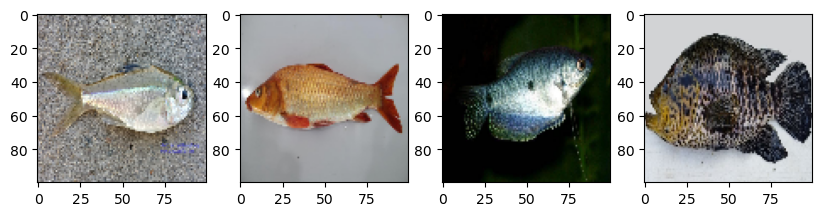

In [122]:
show_img(sources)

75.84437499999999


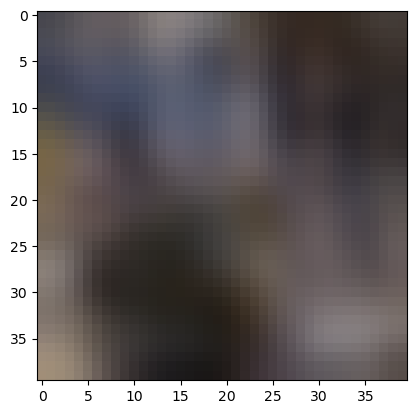

In [123]:
center = sources[3][30:70, 30:70]
center = cv2.GaussianBlur(center,(11,11),0)
# center =cv2.cvtColor(center)
plt.imshow(center,'gray')
print(center.mean(0).mean(0).mean(0))

In [124]:
def median_filter(src: np.ndarray, size=3):
    src_pad = np.pad(src, (size-1)//2, "constant")
    x_axis, y_axis = src.shape
    result = np.zeros_like(src)
    for y in range(y_axis):
        for x in range(x_axis):
            m33 = src_pad[x : x + size, y : y + size]
            flat = np.sort(m33.flatten())
            result[x, y] = flat[(flat.size+1)//2]
    return result

In [129]:
def mask_fish(image):
    # Preprocess
    
    src = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #center image
    center = src[30:70, 30:70]
    center = cv2.GaussianBlur(center,(11,11),0)
    
    #overral image
    #gaussian blur
    src = cv2.GaussianBlur(src,(7,7),0)
    #median filter
    src = median_filter(src,5)

    mean = np.mean(src)
    mean_center = np.mean(center)
    print(f"all: {mean}, center: {mean_center}")

    # Thresholding based on background color
    if mean < mean_center:
        # if avg color is black
        _, mask = cv2.threshold(src, mean, 255, cv2.THRESH_BINARY)
    else:
        _, mask = cv2.threshold(src, mean+10, 255, cv2.THRESH_BINARY_INV)
    #opening
    mask = cv2.morphologyEx(mask,cv2.MORPH_OPEN,np.ones([3,3]))
    mask = binary_fill_holes(mask).astype(np.uint8)
    # mask = np.stack([mask,mask,mask],2)
    masked_image = cv2.bitwise_and(image,image, mask=mask)
    return masked_image

all: 140.5962, center: 161.09
all: 149.6268, center: 129.39875
all: 40.204, center: 144.985625
all: 135.4248, center: 74.405


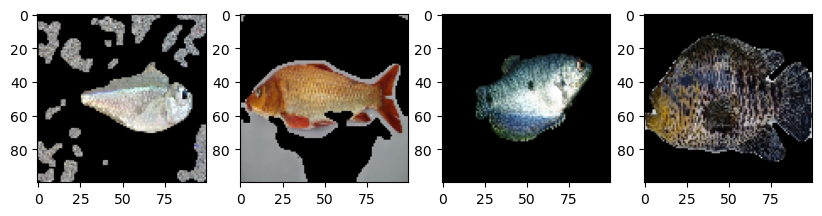

In [130]:
res = []
for item in sources:
    res.append(mask_fish(item))
show_img(res)